In [3]:
import pandas as pd
import datetime
from datetime import date
import numpy as np
import matplotlib as plt


In [4]:
df = pd.read_csv("../../way-to-school-date/school_prep.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55730 entries, 0 to 55729
Data columns (total 71 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   numer_rspo                       55730 non-null  int64  
 1   regon_podmiotu                   55730 non-null  int64  
 2   nip_podmiotu                     28564 non-null  float64
 3   typ                              55730 non-null  object 
 4   nazwa                            55730 non-null  object 
 5   kod_terytorialny_wojewodztwo     55730 non-null  int64  
 6   kod_terytorialny_powiat          55730 non-null  int64  
 7   kod_terytorialny_gmina           55730 non-null  int64  
 8   kod_terytorialny_miejscowosc     55730 non-null  int64  
 9   kod_terytorialny_ulica           46086 non-null  float64
 10  wojewodztwo                      55730 non-null  object 
 11  powiat                           55730 non-null  object 
 12  gmina             

In [6]:
df['rok_zalozenia_cat'] = df['data_zalozenia'].map(lambda x: x.split('-')[0])
df['rok_zalozenia_cat'] = df['rok_zalozenia_cat'].astype('int') 

In [7]:
df['rok_biezacy'] = date.today().year
df['rok_biezacy'] = df['rok_biezacy'].astype('int16')

In [8]:
df['age_school']  = df['rok_biezacy'] - df['rok_zalozenia_cat']

In [9]:
df[df.age_school>100]['numer_rspo'].count()

1629

In [10]:
age_max = df['age_school'].max()

step = 25

def prep(x):
    
    diff = range(0, age_max,step)
    for i in diff:
        if x >= i and x< i+step:
            return i

df['age_school_map'] = df['age_school'].map(prep)
    


In [11]:
df['age_school_map'] = df['age_school'].map(lambda x: 150 if x>=150 else x)

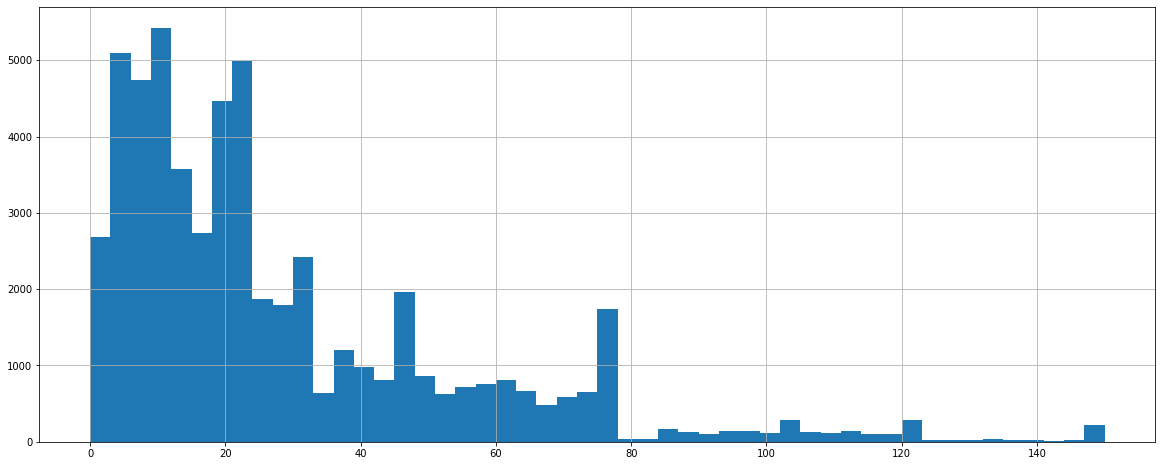

In [12]:
df.age_school_map.hist(bins = 50, figsize=(20,8));

In [13]:
cols = ['typ', 'wojewodztwo', 'powiat', 'publicznosc_status', 'kategoria_uczniow', 'specyfika_placowki', 'typ_organu_prowadzacego', 'gmina_typ', 'wojewodztwo_nazwa']

for col in cols:
    df[col] = df[col].astype('category')


In [14]:
#df['data_rozpoczecia_dzialalnosci']  =  pd.to_datetime(df['data_rozpoczecia_dzialalnosci'], errors = 'coerce')
#df['data_zalozenia']  =  pd.to_datetime(df['data_zalozenia'], errors = 'coerce')

In [15]:
df.select_dtypes("object").columns

Index(['nazwa', 'gmina', 'miejscowosc', 'rodzaj_miejscowosci', 'ulica',
       'numer_budynku', 'numer_lokalu', 'kod_pocztowy', 'poczta', 'telefon',
       'faks', 'e-mail', 'strona_www', 'imie_i_nazwisko_dyrektora',
       'data_zalozenia', 'data_rozpoczecia_dzialalnosci',
       'nazwa_organu_prowadzacego', 'wojewodztwo_organu_prowadzacego',
       'powiat_organu_prowadzacego', 'gmina_organu_prowadzacego',
       'miejsce_w_strukturze', 'typ_podmiotu_nadrzednego',
       'nazwa_podmiotu_nadrzednego', 'tereny_sportowe', 'jezyki_nauczane',
       'gmina_cat', 'powiaty_nazwa', 'gminy_nazwa', 'rank_ha',
       'rank_population'],
      dtype='object')

In [16]:
df['gminy_nazwa'] = df['gminy_nazwa'].astype('category')
df['gmina'] = df['gmina'].astype('category')
df['gmina_cat'] = df['gmina_cat'].astype('category')
df['powiaty_nazwa'] = df['powiaty_nazwa'].astype('category')
df['miejsce_w_strukturze'] = df['miejsce_w_strukturze'].astype('category')

In [17]:
for x in df.select_dtypes('int64').columns:
    if df[x].max() < 4500:
        #print(f'{x}: {df[x].max()}')
        df[x] = df[x].astype('int16')

In [18]:
df_agg_prov = (
    df
    .groupby(['wojewodztwo'])
    .agg(
        school_count = ('numer_rspo', 'count'),
        area_ha_prov = ('area_ha_prov', 'max'),
        area_km_prov = ('area_km_prov', 'max')
        
    )
    .reset_index()
)

In [19]:
df_agg_prov['school_count_area'] = df_agg_prov['school_count']/df_agg_prov['area_km_prov']

In [20]:
df_agg_prov.sort_values(by = 'school_count_area', ascending=False)

,wojewodztwo,school_count,area_ha_prov,area_km_prov,school_count_area
14,ŚLĄSKIE,6133,1233309,12333,0.497284
5,MAŁOPOLSKIE,5458,1518279,15183,0.359481
4,MAZOWIECKIE,7935,3555847,35559,0.223150
7,PODKARPACKIE,3487,1784576,17846,0.195394
0,DOLNOŚLĄSKIE,3791,1994670,19947,0.190054
13,ŁÓDZKIE,3401,1821895,18219,0.186673
9,POMORSKIE,3345,1832368,18323,0.182557
11,WIELKOPOLSKIE,5254,2982650,29826,0.176155
15,ŚWIĘTOKRZYSKIE,1981,1171050,11710,0.169172
6,OPOLSKIE,1544,941187,9412,0.164046


In [25]:
df_agg_dist = (
    df
    .groupby(['powiat','wojewodztwo'])
    .agg(
        school_count = ('numer_rspo', 'count'),
        area_ha_dist = ('area_ha_dist', 'max'),
        area_km_dist = ('area_km_dist', 'max')
        
    )
    .reset_index()
)

df_agg_dist['school_count_area'] = df_agg_dist['school_count']/df_agg_dist['area_km_dist']

In [26]:
df_agg_dist.sort_values(by = 'school_count_area', ascending=False)[:15]

,powiat,wojewodztwo,school_count,area_ha_dist,area_km_dist,school_count_area
868,Warszawa,MAZOWIECKIE,2627,51724.0,517.0,5.081238
24,Białystok,PODLASKIE,499,10213.0,102.0,4.892157
946,Zamość,LUBELSKIE,136,3034.0,30.0,4.533333
676,Siedlce,MAZOWIECKIE,145,3186.0,32.0,4.531250
110,Chorzów,ŚLĄSKIE,144,3324.0,33.0,4.363636
793,Słupsk,POMORSKIE,187,4315.0,43.0,4.348837
490,Olsztyn,WARMIŃSKO-MAZURSKIE,358,8833.0,88.0,4.068182
434,Lublin,LUBELSKIE,580,14747.0,148.0,3.918919
729,Sopot,POMORSKIE,66,1728.0,17.0,3.882353
373,Kraków,MAŁOPOLSKIE,1221,32685.0,327.0,3.733945


In [28]:
df_agg_dist.sort_values(by = 'school_count_area', ascending=True)[:10]

,powiat,wojewodztwo,school_count,area_ha_dist,area_km_dist,school_count_area
4264,sejneński,PODLASKIE,26,85517.0,855.0,0.030409
1976,hajnowski,PODLASKIE,50,162353.0,1624.0,0.030788
4600,suwalski,PODLASKIE,43,130700.0,1307.0,0.032900
1143,bieszczadzki,PODKARPACKIE,38,113907.0,1139.0,0.033363
4563,sulęciński,LUBUSKIE,42,117780.0,1178.0,0.035654
1610,elbląski,WARMIŃSKO-MAZURSKIE,53,141558.0,1416.0,0.037429
5564,łobeski,ZACHODNIOPOMORSKIE,41,106513.0,1065.0,0.038498
3064,moniecki,PODLASKIE,54,138179.0,1382.0,0.039074
2348,koszaliński,ZACHODNIOPOMORSKIE,65,165346.0,1653.0,0.039322
1096,białostocki,PODLASKIE,118,297644.0,2975.0,0.039664


In [308]:
df.typ.nunique()

53

In [29]:
dict_typ = {'Szkoła podstawowa': 'Szkoła podstawowa', 
            'Przedszkole': 'Przedszkole',
            'Liceum ogólnokształcące': 'Liceum ogólnokształcące',
            'Placówka Kształcenia Ustawicznego - bez szkół': 'Other',
            'Szkoła policealna' : 'Other', 
            'Branżowa szkoła I stopnia': 'Branżowa szkoła I stopnia',
            'Technikum':'Technikum', 
            'Punkt przedszkolny': 'Przedszkole',
            'Poradnia psychologiczno-pedagogiczna':'Other',
            'Centrum Kształcenia Zawodowego':'Other',
            'Szkoła specjalna przysposabiająca do pracy': 'Other',
            'Szkoła muzyczna I stopnia':'Szkoła muzyczna I stopnia', 
            'Branżowa szkoła II stopnia':'Branżowa szkoła II stopnia',
            'Placówka doskonalenia nauczycieli':'Other',
            'Niepubliczna placówka oświatowo-wychowawcza w systemie oświaty':'Other',
            'Specjalny Ośrodek Szkolno-Wychowawczy':'Other',
            'Zespół szkół i placówek oświatowych':'Zespół szkół i placówek oświatowych',
            'Szkolne schronisko młodzieżowe':'Other', 
            'Biblioteki pedagogiczne':'Other',
            'Ośrodek Rewalidacyjno-Wychowawczy':'Other', 
            'Bursa':'Other',
            'Szkoła muzyczna II stopnia':'Szkoła muzyczna II stopnia',
            'Placówka Kształcenia Ustawicznego ze szkołami':'Placówka Kształcenia Ustawicznego ze szkołami',
            'Młodzieżowy dom kultury':'Other', 
            'Młodzieżowy Ośrodek Wychowawczy':'Other',
            'Niepubliczna placówka kształcenia ustawicznego i praktycznego':'Niepubliczna placówka kształcenia ustawicznego i praktycznego',
            'Młodzieżowy Ośrodek Socjoterapii ze szkołami':'Młodzieżowy Ośrodek Socjoterapii ze szkołami',
            'Zespół wychowania przedszkolnego':'Przedszkole',
            'Liceum sztuk plastycznych':'Liceum sztuk plastycznych', 
            'Poradnia specjalistyczna':'Other',
            'Ogólnokształcąca szkoła muzyczna I stopnia':'Ogólnokształcąca szkoła muzyczna I stopnia',
            'Ognisko pracy pozaszkolnej':'Other',
            'Międzyszkolny ośrodek sportowy':'Other',
            'Placówki artystyczne (ognisko artystyczne)':'Other',
            'Policealna szkoła plastyczna':'Other',
            'Ogólnokształcąca szkoła muzyczna II stopnia':'Ogólnokształcąca szkoła muzyczna II stopnia',
            'Specjalny Ośrodek Wychowawczy':'Other', 
            'Dom wczasów dziecięcych':'Other',
            'Pozaszkolna placówka specjalistyczna':'Other',
            'Ogólnokształcąca szkoła sztuk pięknych':'Ogólnokształcąca szkoła sztuk pięknych',
            'Pałac młodzieży':'Other',
            'Szkoła sztuki tańca':'Szkoła sztuki tańca', 
            'Inna szkoła artystyczna':'Inna szkoła artystyczna',
            'Policealna szkoła muzyczna':'Other', 
            'Ogród jordanowski':'Other',
            'Gimnazjum':'Gimnazium', 
            'Ogólnokształcąca szkoła baletowa':'Ogólnokształcąca szkoła baletowa',
            'Kolegium Pracowników Służb Społecznych':'Other',
            'Niepubliczna placówka kształcenia ustawicznego i praktycznego ze szkołami':'Niepubliczna placówka kształcenia ustawicznego i praktycznego ze szkołami',
            'Centrum Kształcenia Praktycznego':'Other',
            'Poznańska szkoła chóralna':'Poznańska szkoła chóralna', 
            'Szkoła sztuki cyrkowej':'Szkoła sztuki cyrkowej',
            'Bednarska Szkoła Realna':'Bednarska Szkoła Realna' }


In [30]:
df['typ_cat'] = df['typ'].map(dict_typ)


In [42]:
pd.DataFrame(df['typ_cat'].value_counts())

,typ_cat
Przedszkole,15549
Szkoła podstawowa,14461
Other,10611
Zespół szkół i placówek oświatowych,5245
Liceum ogólnokształcące,4142
Branżowa szkoła I stopnia,2138
Technikum,2006
Szkoła muzyczna I stopnia,487
Branżowa szkoła II stopnia,420
Szkoła muzyczna II stopnia,139


In [43]:
pd.DataFrame(df[df['typ_cat'] == 'Other']['typ'].value_counts())

,typ
Placówka Kształcenia Ustawicznego - bez szkół,3060
Szkoła policealna,2544
Poradnia psychologiczno-pedagogiczna,1195
Centrum Kształcenia Zawodowego,581
Szkoła specjalna przysposabiająca do pracy,566
Placówka doskonalenia nauczycieli,374
Niepubliczna placówka oświatowo-wychowawcza w systemie oświaty,351
Specjalny Ośrodek Szkolno-Wychowawczy,336
Szkolne schronisko młodzieżowe,314
Biblioteki pedagogiczne,238
